# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [88]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [12]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [13]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = sent.lower()
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:55<00:00, 1955.45it/s]


In [16]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [17]:
# printing some project titles.
for i in range (0,21):
    
    print(project_data['project_title'].values[i])
    print("="*50)

Educational Support for English Learners at Home
Wanted: Projector for Hungry Learners
Soccer Equipment for AWESOME Middle School Students
Techie Kindergarteners
Interactive Math Tools
Flexible Seating for Mrs. Jarvis' Terrific Third Graders!!
Chromebooks for Special Education Reading Program
It's the 21st Century
Targeting More Success in Class
Just For the Love of Reading--\r\nPure Pleasure
Reading Changes Lives
Elevating Academics and Parent Rapports Through Technology
Building Life Science Experiences
Everyone deserves to be heard!
TABLETS CAN SHOW US THE WORLD
Making Recess Active
Making Great LEAP's With Leapfrog!
Technology Teaches Tomorrow's Talents Today
Test Time
Wiggling Our Way to Success
Magic Carpet Ride in Our Library


In [18]:
preprocessed_titles = []

for dataset in tqdm(project_data['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    data = data.lower()
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    preprocessed_titles.append(data.strip()) 

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34493.08it/s]


In [19]:
for i in range (0,21):
    print(preprocessed_titles[i])
    print("="*50)

educational support english learners home
wanted projector hungry learners
soccer equipment awesome middle school students
techie kindergarteners
interactive math tools
flexible seating mrs jarvis terrific third graders
chromebooks special education reading program
century
targeting success class
love reading pure pleasure
reading changes lives
elevating academics parent rapports technology
building life science experiences
everyone deserves heard
tablets show us world
making recess active
making great leap leapfrog
technology teaches tomorrow talents today
test time
wiggling way success
magic carpet ride library


In [20]:
project_data["preprocessed_titles"] = preprocessed_titles

title_word_count = []

for sentence in project_data["preprocessed_titles"] :
    word = len(sentence.split())
    title_word_count.append(word)
    
project_data["title_word_count"] = title_word_count

project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,preprocessed_titles,title_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,educational support english learners home,5
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,wanted projector hungry learners,4
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",soccer equipment awesome middle school students,6
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,techie kindergarteners,2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,interactive math tools,3


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_titles', 'title_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer = CountVectorizer()
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (109248, 9)


In [23]:
# we use count vectorizer to convert the values into one 
# vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer = CountVectorizer()
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (109248, 30)


In [24]:
school_state_vectorizer = CountVectorizer(lowercase=False, binary=True)
school_state_vectorizer.fit(project_data['school_state'].values)
print(school_state_vectorizer.get_feature_names())

school_state_one_hot = school_state_vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)
print("the type of count vectorizer ",type(school_state_one_hot))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (109248, 51)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>


In [25]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data["teacher_prefix"].fillna("No_Prefix", inplace = True)
    
teacher_prefix_vectorizer = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(project_data['teacher_prefix'].values)
print(teacher_prefix_vectorizer.get_feature_names())

teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'No_Prefix', 'Teacher']
Shape of matrix after one hot encodig  (109248, 6)


In [26]:
my_grade_counter = Counter()

for project_grade in project_data['project_grade_category'].values:
    
    if (' ' in project_grade):
        
        project_grade = project_grade.replace(" ", "~")
        
        
    my_grade_counter.update(project_grade.split())
    
    
project_grade_cat_dict = dict(my_grade_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
    
grade_cat_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
grade_cat_vectorizer.fit(project_data['project_grade_category'].values)
print(grade_cat_vectorizer.get_feature_names())

grade_cat_one_hot = grade_cat_vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot.shape)

['Grades~9-12', 'Grades~6-8', 'Grades~3-5', 'Grades~PreK-2']
Shape of matrix after one hot encodig  (109248, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
vectorizer = CountVectorizer()
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 56215)


In [28]:
titles_vectorizer = CountVectorizer()
titles_bow = titles_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_vectorizer.get_feature_names()[0:10])
print("Shape of matrix after one hot encodig ",titles_bow.shape)
print("the type of count vectorizer ",type(titles_bow))
print("the number of unique words ", titles_bow.get_shape()[1])

some sample features(unique words in the corpus) ['aaa', 'aaaaachhhooo', 'aaaand', 'aac', 'aagain', 'aahhhhh', 'aardvark', 'aargh', 'aaron', 'aarows']
Shape of matrix after one hot encodig  (109248, 16383)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  16383


#### 1.5.2.2 TFIDF vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_tfidf_vectorizer = TfidfVectorizer()
text_tfidf = text_tfidf_vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 56215)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:28<00:00, 3867.35it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:14<00:00, 561.84it/s]


109248
300


In [35]:
# TFIDF on project titles
titles_tfidf_vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = titles_tfidf_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_tfidf_vectorizer.get_feature_names()[10:21])
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

some sample features(unique words in the corpus) ['acceptance', 'access', 'accessibility', 'accessible', 'accessing', 'accessories', 'ace', 'achieve', 'achievement', 'achievers', 'achieves']
Shape of matrix after one hot encodig  (109248, 3183)


In [36]:
# AVG W2V on project title
avg_w2v_titles_vectors = [];

for sentence in tqdm(preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    avg_w2v_titles_vectors.append(vector_titles)

print(len(avg_w2v_titles_vectors))
print(len(avg_w2v_titles_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 75163.60it/s]


109248
300


In [37]:
# TFIDF weighted W2V on project_title
titles_tfidf_model = TfidfVectorizer()
titles_tfidf_model.fit(preprocessed_titles)
titles_dictionary = dict(zip(titles_tfidf_model.get_feature_names(), list(titles_tfidf_model.idf_)))
titles_tfidf_words = set(titles_tfidf_model.get_feature_names())


In [38]:
titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    titles_tfidf_w2v_vectors.append(titles_vector)

print(len(titles_tfidf_w2v_vectors))
print(len(titles_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 40766.05it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [89]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [90]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [91]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ..., 
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [42]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 56215)
(109248, 1)


In [43]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 56255)

__ Computing Sentiment Scores__

In [44]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



In [45]:
approved_project = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_titles,title_word_count,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,educational support english learners home,5,154.6,23


In [46]:
# Data splitting

from sklearn.model_selection import train_test_split

# Splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(project_data, approved_project, test_size=0.33, stratify=approved_project)

# Splitting in Train Test and Cross Validation
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [47]:
# Vectorizing Categories on Train, Test and CV data
from sklearn.feature_extraction.text import CountVectorizer

ccvectorizer = CountVectorizer(lowercase=False, binary=True)

# Fit only to train data
ccvectorizer.fit(X_train['clean_categories'].values)

# Transform to train,test and CV data
X_Train_categories_one_hot = ccvectorizer.transform(X_train['clean_categories'].values)
X_Test_categories_one_hot = ccvectorizer.transform(X_test['clean_categories'].values)
X_CV_categories_one_hot = ccvectorizer.transform(X_cv['clean_categories'].values)

print("Shape of train matrix after one hot encodig ",X_Train_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_categories_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_categories_one_hot.shape)

Shape of train matrix after one hot encodig  (49041, 9)
Shape of test matrix after one hot encodig  (36052, 9)
Shape of cv matrix after one hot encodig  (24155, 9)


In [48]:
# Vectorizing subcategories on train, test and cv

csvectorizer = CountVectorizer(lowercase=False, binary=True)
csvectorizer.fit(X_train['clean_subcategories'].values)

X_Train_sub_categories_one_hot = csvectorizer.transform(X_train['clean_subcategories'].values)
X_Test_sub_categories_one_hot = csvectorizer.transform(X_test['clean_subcategories'].values)
X_CV_sub_categories_one_hot = csvectorizer.transform(X_cv['clean_subcategories'].values)

print("Shape of train matrix after one hot encodig ",X_Train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_sub_categories_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_sub_categories_one_hot.shape)

Shape of train matrix after one hot encodig  (49041, 30)
Shape of test matrix after one hot encodig  (36052, 30)
Shape of cv matrix after one hot encodig  (24155, 30)


In [49]:
# Vectorizing school state on train , test and cv

school_state_vectorizer = CountVectorizer(lowercase=False, binary=True)

school_state_vectorizer.fit(X_train['school_state'].values)
print(school_state_vectorizer.get_feature_names())

X_Train_school_state_one_hot = school_state_vectorizer.transform(X_train['school_state'].values)
X_Test_school_state_one_hot = school_state_vectorizer.transform(X_test['school_state'].values)
X_CV_school_state_one_hot = school_state_vectorizer.transform(X_cv['school_state'].values)

print("Shape of train matrix after one hot encodig ",X_Train_school_state_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_school_state_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_school_state_one_hot.shape)

print("the type of count vectorizer ",type(X_Train_school_state_one_hot))
print("the type of count vectorizer ",type(X_Test_school_state_one_hot))
print("the type of count vectorizer ",type(X_CV_school_state_one_hot))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of train matrix after one hot encodig  (49041, 51)
Shape of test matrix after one hot encodig  (36052, 51)
Shape of cv matrix after one hot encodig  (24155, 51)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>


In [50]:
# Vectorizing teacher prefix on train , test and cv

project_data["teacher_prefix"].fillna("No_Prefix", inplace = True)
    
teacher_prefix_vectorizer = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(X_train['teacher_prefix'].values)

print(teacher_prefix_vectorizer.get_feature_names())

X_Train_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_train['teacher_prefix'].values)
X_Test_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_test['teacher_prefix'].values)
X_CV_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_cv['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",X_Train_teacher_prefix_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_teacher_prefix_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'No_Prefix', 'Teacher']
Shape of train matrix after one hot encodig  (49041, 6)
Shape of test matrix after one hot encodig  (36052, 6)
Shape of cv matrix after one hot encodig  (24155, 6)


In [52]:
# Vectorizing grade category on train , test and cv

my_grade_counter = Counter()

for project_grade in project_data['project_grade_category'].values:
    
    if (' ' in project_grade):
        
        project_grade = project_grade.replace(" ", "~")
        
    my_grade_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_grade_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
    
grade_cat_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
grade_cat_vectorizer.fit(X_train['project_grade_category'].values)
print(grade_cat_vectorizer.get_feature_names())

X_Train_grade_cat_one_hot = grade_cat_vectorizer.transform(X_train['project_grade_category'].values)
X_Test_grade_cat_one_hot = grade_cat_vectorizer.transform(X_test['project_grade_category'].values)
X_CV_grade_cat_one_hot = grade_cat_vectorizer.transform(X_cv['project_grade_category'].values)

print("Shape of train matrix after one hot encodig ",X_Train_grade_cat_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_grade_cat_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_grade_cat_one_hot.shape)

['Grades~9-12', 'Grades~6-8', 'Grades~3-5', 'Grades~PreK-2']
Shape of train matrix after one hot encodig  (49041, 4)
Shape of test matrix after one hot encodig  (36052, 4)
Shape of cv matrix after one hot encodig  (24155, 4)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [53]:
# merge two column text dataframe: 
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [54]:
# preprocessing essay train data
from tqdm import tqdm
X_Train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['essay'].values):
    X_Train_essay_sent = decontracted(sentance)
    X_Train_essay_sent = X_Train_essay_sent.replace('\\r', ' ')
    X_Train_essay_sent = X_Train_essay_sent.replace('\\"', ' ')
    X_Train_essay_sent = X_Train_essay_sent.replace('\\n', ' ')
    X_Train_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_Train_essay_sent)
    X_Train_essay_sent = X_Train_essay_sent.lower()
    X_Train_essay_sent = ' '.join(e for e in X_Train_essay_sent.split() if e not in stopwords)
    X_Train_preprocessed_essays.append(X_Train_essay_sent.strip())

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:25<00:00, 1940.01it/s]


In [55]:
# preprocessing essay test data
from tqdm import tqdm
X_Test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    X_Test_essay_sent = decontracted(sentence)
    X_Test_essay_sent = X_Test_essay_sent.replace('\\r', ' ')
    X_Test_essay_sent = X_Test_essay_sent.replace('\\"', ' ')
    X_Test_essay_sent = X_Test_essay_sent.replace('\\n', ' ')
    X_Test_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_Test_essay_sent)
    X_Test_essay_sent = X_Test_essay_sent.lower()
    X_Test_essay_sent = ' '.join(e for e in X_Test_essay_sent.split() if e not in stopwords)
    X_Test_preprocessed_essays.append(X_Test_essay_sent.strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:18<00:00, 1996.97it/s]


In [56]:
# preprocessing essay cv data
from tqdm import tqdm
X_CV_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    X_CV_essay_sent = decontracted(sentence)
    X_CV_essay_sent = X_CV_essay_sent.replace('\\r', ' ')
    X_CV_essay_sent = X_CV_essay_sent.replace('\\"', ' ')
    X_CV_essay_sent = X_CV_essay_sent.replace('\\n', ' ')
    X_CV_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_CV_essay_sent)
    X_CV_essay_sent = X_CV_essay_sent.lower()
    X_CV_essay_sent = ' '.join(e for e in X_CV_essay_sent.split() if e not in stopwords)
    X_CV_preprocessed_essays.append(X_CV_essay_sent.strip())

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:12<00:00, 1949.46it/s]


In [57]:
# preprocessing project title train data
X_Train_preprocessed_titles = []

for dataset in tqdm(X_train['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    data = data.lower()
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    X_Train_preprocessed_titles.append(data.strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 35415.94it/s]


In [58]:
# preprocessing project title test data
X_Test_preprocessed_titles = []

for dataset in tqdm(X_test['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    data = data.lower()
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    X_Test_preprocessed_titles.append(data.strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 35000.83it/s]


In [59]:
# preprocessing project title cv data
X_CV_preprocessed_titles = []

for dataset in tqdm(X_cv['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    data = data.lower()
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords  
    X_CV_preprocessed_titles.append(data.strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 34730.08it/s]


In [62]:
# BOW Essay train, test and cv data
# We are considering only the words which appeared in at least 10 documents(rows or projects).
bow_essay_vectorizer = CountVectorizer()
bow_essay_vectorizer.fit(X_Train_preprocessed_essays)

X_Train_essay_bow = bow_essay_vectorizer.transform(X_Train_preprocessed_essays)
X_Test_essay_bow = bow_essay_vectorizer.transform(X_Test_preprocessed_essays)
X_CV_essay_bow = bow_essay_vectorizer.transform(X_CV_preprocessed_essays)

print("Shape of train matrix after one hot encodig ",X_Train_essay_bow.shape)
print("Shape of test matrix after one hot encodig ",X_Test_essay_bow.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_essay_bow.shape)

Shape of train matrix after one hot encodig  (49041, 124)
Shape of test matrix after one hot encodig  (36052, 124)
Shape of CV matrix after one hot encodig  (24155, 124)


In [63]:
# BOW title train,test and cv data

titles_vectorizer = CountVectorizer()
titles_vectorizer.fit(X_Train_preprocessed_titles)

X_Train_titles_bow = titles_vectorizer.transform(X_Train_preprocessed_titles)
X_Test_titles_bow = titles_vectorizer.transform(X_Test_preprocessed_titles)
X_CV_titles_bow = titles_vectorizer.transform(X_CV_preprocessed_titles)

print("some sample features(unique words in the corpus)",titles_vectorizer.get_feature_names()[0:10])
print("Shape of train matrix after one hot encodig ",X_Train_titles_bow.shape)
print("Shape of test matrix after one hot encodig ",X_Test_titles_bow.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_titles_bow.shape)

some sample features(unique words in the corpus) ['aaa', 'aac', 'aahhhhh', 'aardvark', 'ab', 'aba', 'abbott', 'abc', 'abcs', 'abilities']
Shape of train matrix after one hot encodig  (49041, 11255)
Shape of test matrix after one hot encodig  (36052, 11255)
Shape of CV matrix after one hot encodig  (24155, 11255)


In [64]:
#TFIDF essay train,test and cv data

tfidf_essay_vectorizer = TfidfVectorizer()
tfidf_essay_vectorizer.fit(X_Train_preprocessed_essays)

X_Train_essay_tfidf = tfidf_essay_vectorizer.transform(X_Train_preprocessed_essays)
X_Test_essay_tfidf = tfidf_essay_vectorizer.transform(X_Test_preprocessed_essays)
X_CV_essay_tfidf = tfidf_essay_vectorizer.transform(X_CV_preprocessed_essays)

print("Shape of train matrix after one hot encodig ",X_Train_essay_tfidf.shape)
print("Shape of test matrix after one hot encodig ",X_Test_essay_tfidf.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_essay_tfidf.shape)

Shape of train matrix after one hot encodig  (49041, 124)
Shape of test matrix after one hot encodig  (36052, 124)
Shape of CV matrix after one hot encodig  (24155, 124)


In [65]:
# TFIDF on project titles train,test and cv data

titles_tfidf_vectorizer = TfidfVectorizer()
titles_tfidf_vectorizer.fit(X_Train_preprocessed_titles)

X_Train_titles_tfidf = titles_vectorizer.transform(X_Train_preprocessed_titles)
X_Test_titles_tfidf = titles_vectorizer.transform(X_Test_preprocessed_titles)
X_CV_titles_tfidf = titles_vectorizer.transform(X_CV_preprocessed_titles)

print("Shape of train matrix after one hot encodig ",X_Train_titles_tfidf.shape)
print("Shape of test matrix after one hot encodig ",X_Test_titles_tfidf.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_titles_tfidf.shape)

Shape of train matrix after one hot encodig  (49041, 11255)
Shape of test matrix after one hot encodig  (36052, 11255)
Shape of CV matrix after one hot encodig  (24155, 11255)


In [67]:
# average Word2Vec essay on train
# compute average word2vec for each review.
X_Train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Train_avg_w2v_vectors.append(vector)

print(len(X_Train_avg_w2v_vectors))
print(len(X_Train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:10<00:00, 4495.66it/s]


49041
300


In [68]:
# average Word2Vec essay on test
# compute average word2vec for each review.
X_Test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Test_avg_w2v_vectors.append(vector)

print(len(X_Test_avg_w2v_vectors))
print(len(X_Test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:09<00:00, 3918.22it/s]


36052
300


In [69]:
# average Word2Vec essay on cv
# compute average word2vec for each review.
X_CV_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_CV_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_CV_avg_w2v_vectors.append(vector)

print(len(X_CV_avg_w2v_vectors))
print(len(X_CV_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:05<00:00, 4062.97it/s]


24155
300


In [70]:
# AVG W2V on project title train
X_Train_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Train_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Train_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Train_avg_w2v_titles_vectors))
print(len(X_Train_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 73757.03it/s]


49041
300


In [71]:
# AVG W2V on project title test
X_Test_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Test_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Test_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Test_avg_w2v_titles_vectors))
print(len(X_Test_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 77898.97it/s]


36052
300


In [72]:
# AVG W2V on project title cv
X_CV_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_CV_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_CV_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_CV_avg_w2v_titles_vectors))
print(len(X_CV_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 74331.85it/s]


24155
300


In [73]:
# TFIDF W2V 
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_Train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# TFIDF w2v essay train
# compute average word2vec for each review.
X_Train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_Train_tfidf_w2v_vectors.append(vector)

print(len(X_Train_tfidf_w2v_vectors))
print(len(X_Train_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:27<00:00, 562.67it/s]


49041
300


In [75]:
# TFIDF w2v essay test
# compute average word2vec for each review.
X_Test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_Test_tfidf_w2v_vectors.append(vector)

print(len(X_Test_tfidf_w2v_vectors))
print(len(X_Test_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:13<00:00, 2770.96it/s]


36052
300


In [76]:
# TFIDF w2v essay cv
# compute average word2vec for each review.
X_CV_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_CV_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_CV_tfidf_w2v_vectors.append(vector)

print(len(X_CV_tfidf_w2v_vectors))
print(len(X_CV_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:08<00:00, 2787.97it/s]


24155
300


In [77]:
# TFIDF weighted W2V on project_title
titles_tfidf_model = TfidfVectorizer()
titles_tfidf_model.fit(X_Train_preprocessed_titles)
titles_dictionary = dict(zip(titles_tfidf_model.get_feature_names(), list(titles_tfidf_model.idf_)))
titles_tfidf_words = set(titles_tfidf_model.get_feature_names())

In [78]:
# TFIDF w2v title train
X_Train_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_Train_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_Train_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_Train_titles_tfidf_w2v_vectors))
print(len(X_Train_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 40587.16it/s]


49041
300


In [79]:
# TFIDF w2v title train
X_Test_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_Test_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_Test_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_Test_titles_tfidf_w2v_vectors))
print(len(X_Test_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 41552.11it/s]


36052
300


In [80]:
# TFIDF w2v title cv
X_CV_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_CV_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_CV_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_CV_titles_tfidf_w2v_vectors))
print(len(X_CV_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 40861.87it/s]


24155
300


In [92]:
# Vectorizing numerical feature

# Merging price data with train, test and cv
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [93]:
# Standardizing price train test and cv data

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [94]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [97]:
import sys
import math
 
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

# you might need to install this one
import xgboost as xgb

class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)
###################################################################
#               Change from here                                  #
###################################################################
parameters = {
    'num_boost_round': [100, 250, 500],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

clf = GridSearchCV(clf, parameters)
X = np.array([[1,2], [3,4], [2,1], [4,3], [1,0], [4,5]])
Y = np.array([0, 1, 0, 1, 0, 1])
clf.fit(X, Y)

# print(clf.grid_scores_)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

score: 1.0
colsample_bytree: 0.9
eta: 0.05
max_depth: 6
num_boost_round: 100
subsample: 0.9


<h1>2. TruncatedSVD </h1>

<h2>2.1 Selecting top 2000 words from `essay` and `project_title`</h2>

In [98]:
# Concatenating essay and project_title features

essay_titles_feature_names = tfidf_essay_vectorizer.get_feature_names() + titles_tfidf_vectorizer.get_feature_names()

print(len(essay_titles_feature_names))

11379


In [99]:
# selecting top 2000 words

top_2000_feature = []

for val in range(0,2000):
        
        top_2000_feature.append(essay_titles_feature_names[val])

print(len(top_2000_feature))

2000


<h2>2.2 Computing Co-occurance matrix</h2>

In [100]:
# merge essay and titles:

X_train["essay_titles"] = X_train["essay"].map(str) + X_train["project_title"].map(str)

In [101]:
# Checking occurance matrix definition

Courpus = "abc def ijk pqr","pqr klm opq","lmn pqr xyz abc def pqr abc"
top_words = "abc", "pqr", "def"
window_size = 2

occ_mat = np.zeros((2000,2000))

for line in tqdm(Courpus):
    
    words_in_project_data = line.split()
    
    for index,word in enumerate(words_in_project_data):
        
        if word in top_words:
            
            for j in range(max(index - window_size, 0), min(index + window_size, len(words_in_project_data) - 1) + 1):
            
                if words_in_project_data[j] in top_words:
                
                    occ_mat[top_words.index(word),top_words.index(words_in_project_data[j])] += 1
                
                else:
                    pass
            
            else:
                pass
            
        else:
            pass



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3008.83it/s]


In [102]:
occ_mat

array([[ 3.,  3.,  3., ...,  0.,  0.,  0.],
       [ 3.,  4.,  2., ...,  0.,  0.,  0.],
       [ 3.,  2.,  2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [104]:
# https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
# https://stackoverflow.com/questions/41661801/python-calculate-the-co-occurrence-matrix
# https://datascience.stackexchange.com/questions/40038/how-to-implement-word-to-word-co-occurence-matrix-in-python
# https://www.pythonprogramming.in/how-to-calculate-a-word-word-co-occurrence-matrix.html
# https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d

window_size = 5
occ_mat = np.zeros((2000,2000))

for line in tqdm(X_train["essay_titles"].values):
    
    words_in_project_data = line.split()
    
    for index,word in enumerate(words_in_project_data):
        
        if word in top_2000_feature:
            
            for j in range(max(index - window_size, 0), min(index + window_size, len(words_in_project_data) - 1) + 1):
            
                if words_in_project_data[j] in top_2000_feature:
                
                    occ_mat[top_2000_feature.index(word),top_2000_feature.index(words_in_project_data[j])] += 1
                
                else:
                    pass
            
            else:
                pass
            
        else:
            pass



100%|████████████████████████████████████████████████████████████████████████████| 49041/49041 [12:12<00:00, 66.94it/s]


In [105]:
occ_mat

array([[  2.10000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.55100000e+03,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.00000000e+00,   1.45750000e+04, ...,
          0.00000000e+00,   5.00000000e+00,   3.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   5.00000000e+00, ...,
          0.00000000e+00,   1.12600000e+03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   3.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.87000000e+02]])

<h2>2.3 Applying TruncatedSVD and Calculating Vectors for `essay` and `project_title`</h2>

Number of components = 1 and explained variance = 0.77000988529426306
Number of components = 100 and explained variance = 0.99744902179269135
Number of components = 200 and explained variance = 0.99953342644211307
Number of components = 300 and explained variance = 0.99987115702764273
Number of components = 400 and explained variance = 0.99995941178228387
Number of components = 500 and explained variance = 0.99998415982769628
Number of components = 600 and explained variance = 0.99999359140641053
Number of components = 700 and explained variance = 0.99999702359735021
Number of components = 800 and explained variance = 0.99999868068553688
Number of components = 900 and explained variance = 0.99999943124186597
Number of components = 1000 and explained variance = 0.99999978351124374
Number of components = 1100 and explained variance = 0.99999992917147418
Number of components = 1200 and explained variance = 0.99999997992527523
Number of components = 1300 and explained variance = 0.99999999

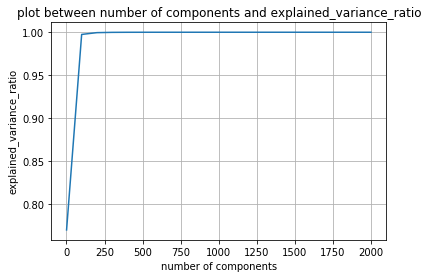

In [107]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
# https://stackoverflow.com/questions/20563239/truncatedsvd-explained-variance

from sklearn.decomposition import TruncatedSVD
n_components = [1, 100, 200, 300 ,400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 1999]
explained_variance_ratio = []

for val in n_components:
    
    svd = TruncatedSVD(n_components = val)
    svd_final = svd.fit_transform(occ_mat)
    
    explained_variance_ratio.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r" %(val, svd.explained_variance_ratio_.sum()))

plt.figure(figsize=(6, 4))
plt.plot(n_components, explained_variance_ratio)
plt.axis('tight')
plt.grid()
plt.xlabel('number of components')
plt.ylabel('explained_variance_ratio')
plt.title("plot between number of components and explained_variance_ratio")
plt.show()


In [111]:
svd = TruncatedSVD(n_components = 300)
svd_final = svd.fit_transform(occ_mat)


In [112]:
svd_final.shape

(2000, 300)

In [113]:
# average Word2Vec essay on train
# compute average word2vec for each review.
X_Train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in top_2000_feature:
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Train_avg_w2v_vectors.append(vector)

print(len(X_Train_avg_w2v_vectors))
print(len(X_Train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:24<00:00, 2028.89it/s]


49041
300


In [114]:
# average Word2Vec essay on test
# compute average word2vec for each review.
X_Test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in top_2000_feature:
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Test_avg_w2v_vectors.append(vector)

print(len(X_Test_avg_w2v_vectors))
print(len(X_Test_avg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:56<00:00, 309.34it/s]


36052
300


In [115]:
# average Word2Vec essay on cv
# compute average word2vec for each review.
X_CV_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_CV_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in top_2000_feature:
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_CV_avg_w2v_vectors.append(vector)

print(len(X_CV_avg_w2v_vectors))
print(len(X_CV_avg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:17<00:00, 310.37it/s]


24155
300


In [116]:
# AVG W2V on project title train
X_Train_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Train_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in top_2000_feature:
            
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Train_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Train_avg_w2v_titles_vectors))
print(len(X_Train_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:04<00:00, 10159.53it/s]


49041
300


In [117]:
# AVG W2V on project title test
X_Test_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Test_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in top_2000_feature:
            
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Test_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Test_avg_w2v_titles_vectors))
print(len(X_Test_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:03<00:00, 10163.98it/s]


36052
300


In [118]:
# AVG W2V on project title cv
X_CV_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_CV_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in top_2000_feature:
            
            vector += svd_final[top_2000_feature.index(word)]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_CV_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_CV_avg_w2v_titles_vectors))
print(len(X_CV_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:02<00:00, 10118.73it/s]


24155
300


<h2>2.4 Merge the features from <font color='red'>step 3</font> and <font color='red'>step 4</font></h2>

In [119]:
# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_avg_w2v_vectors,X_Train_avg_w2v_titles_vectors,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_avg_w2v_vectors,X_CV_avg_w2v_titles_vectors,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_avg_w2v_vectors,X_Test_avg_w2v_titles_vectors,
               X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)


<h2>2.5 Apply XGBoost on the Final Features from the above section</h2>

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [122]:
import sys
import math
 
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

import xgboost as xgb

class XGBoostClassifier():
    
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)

parameters = {
    'n_estimators': [1, 5, 10],
    'num_boost_round': [1, 10, 20],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [1, 5, 10],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

clf = GridSearchCV(clf, parameters)
clf.fit(X_tr, y_train)

# print(clf.grid_scores_)
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

score: 0.5689220173297862
colsample_bytree: 0.9
eta: 0.1
max_depth: 5
n_estimators: 1
num_boost_round: 20
subsample: 0.9


In [126]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

neigh = XGBClassifier(class_weight='balanced')
parameters = {'n_estimators': [1, 2, 4, 8, 16], 'max_depth': [1, 5, 10, 50]}

clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc')
clf.fit(X_tr, y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 4, 8, 16], 'max_depth': [1, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [127]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [128]:
n_estimators = [1, 2, 4, 8, 16]
max_depth = [1, 5, 10, 50]

train_auc = np.array(train_auc).reshape((len(n_estimators), len(max_depth)))
df_train = pd.DataFrame(train_auc, columns = max_depth, index = n_estimators)


cv_auc = np.array(cv_auc).reshape((len(n_estimators), len(max_depth)))
df_cv = pd.DataFrame(cv_auc, columns = max_depth, index = n_estimators)

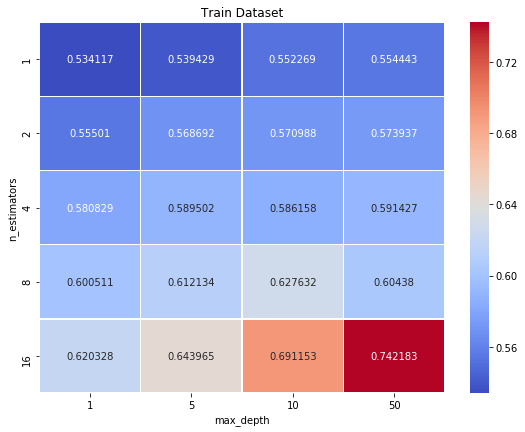

In [129]:
plt.figure(figsize=(20, 15))

ax_train = plt.subplot(222)
sns.heatmap(df_train, annot=True, linewidth = 0.5, cmap='coolwarm', ax = ax_train, fmt='g')

ax_train.set_xlabel('max_depth')
ax_train.set_ylabel('n_estimators')

plt.title("Train Dataset")
plt.show()

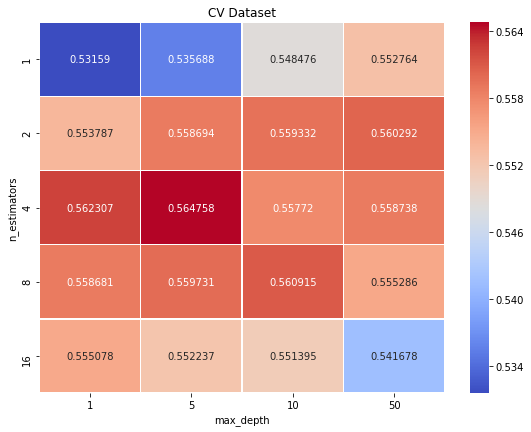

In [130]:
plt.figure(figsize=(20, 15))

ax_cv = plt.subplot(222)
sns.heatmap(df_cv, annot=True, linewidth = 0.5, cmap='coolwarm', ax = ax_cv, fmt='g')

ax_cv.set_xlabel('max_depth')
ax_cv.set_ylabel('n_estimators')

plt.title("CV Dataset")
plt.show()

In [133]:
def batch_predict(clf, data):

    y_data_pred = []
    
    # Changing the shape of predicted data in the multiple of 1000
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    # Running the loop for each 1000th data
    for i in range(0, tr_loop, 1000):
        
        # Predicting probability
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

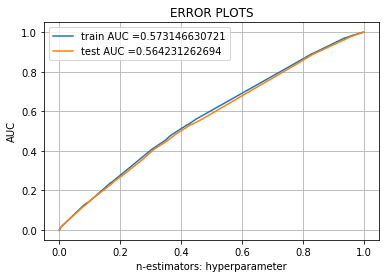

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = XGBClassifier(class_weight = 'balanced', max_depth = 3, n_estimators = 15)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("n-estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [142]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [143]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.247326054453 for threshold 0.767
[[ 4097  3329]
 [18332 23283]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.248906728004 for threshold 0.767
[[ 2910  2549]
 [13506 17087]]


the maximum value of tpr*(1-fpr) 0.247326054453 for threshold 0.767
Train Confusion Matrix


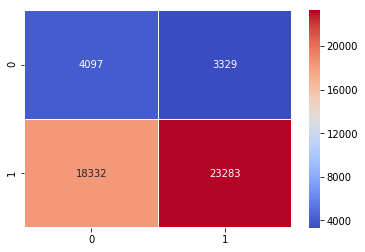

In [144]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

# Train Confusion Matrix Heatmap
train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))

print("Train Confusion Matrix")
sns.heatmap(train_confusion_matrix,annot=True,linewidth = 0.1, cmap='coolwarm', fmt='g')


the maximum value of tpr*(1-fpr) 0.248906728004 for threshold 0.767
Test Confusion Matrix


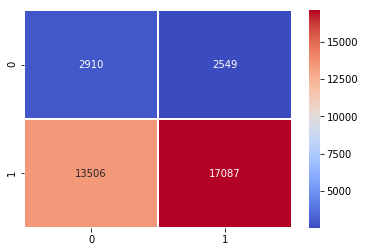

In [145]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Test Confusion Matrix Heatmap

test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))

print("Test Confusion Matrix")
sns.heatmap(test_confusion_matrix,annot=True,linewidth = 0.5, cmap='coolwarm', fmt='g')

<h1>3. Conclusion</h1>

In [146]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Featurization", "Score", "Colsample_bytree", "eta", "max_depth", "num_boost_round", "subsample", "n_estimators"]

x.add_row(["XGBoost with DMATRIX", 0.57, 0.9, 0.1, 5, 20, 0.9, 1])
x.add_row(["XGBClassifier", 0.56, 1, "na", 3, "na", 1, 15])
print(x)

+----------------------+-------+------------------+-----+-----------+-----------------+-----------+--------------+
|    Featurization     | Score | Colsample_bytree | eta | max_depth | num_boost_round | subsample | n_estimators |
+----------------------+-------+------------------+-----+-----------+-----------------+-----------+--------------+
| XGBoost with DMATRIX |  0.57 |       0.9        | 0.1 |     5     |        20       |    0.9    |      1       |
|    XGBClassifier     |  0.56 |        1         |  na |     3     |        na       |     1     |      15      |
+----------------------+-------+------------------+-----+-----------+-----------------+-----------+--------------+


**Brief Conclusion on Assignment**

1. Read and loaded DonorsChoose Data from .csv file.

2. Preprocessed each attributes of data after 70:30 data splitting.

3. Prepared data for models by using BOW, TFIDF, Avg W2V and TFIDF W2V.

4. Concatenate essay and titles data of tfidf values and selected top 2000 values.

5. Created definition for co occurence matrix on train data and verified using a sample data and then calculated co occurence matrix with values created in step 4.

6. Applied Trncated SVD to reduce the dimension of cooccurence matrix data. Choose best dimension between 1 to 2000 from elbow plot.

7. Vectorized essay and titles data using Avg W2V and taken words into consideration which are available in top 2000 values selected in step 4.

8. Concatenate all the feature vectorization and created a new matrix.

9. Applied XGBoost with DMATRIX and XGBClassifier on data with diffrent hyperparameters and get the best parameters and score.

10. Displayed the best hyperparameters and score using prettytable. 